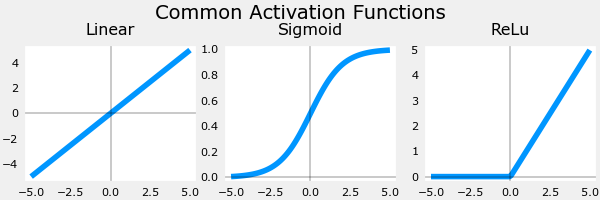

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)
plt_act_trio()

In [2]:
# my_softmax

def my_softmax(z):  
    """ Softmax convierte un vector eun una probabilidad.
    Args:
      z (ndarray (N,))  : dato, N 
    Retu:
      a (ndarray (N,))  : softmax de z
    """    
    # Calcula el exponencial del vector de entrada.
    exp_z = np.exp(z - np.max(z))   
    # Calcula probabilidades softmax
    a = exp_z / np.sum(exp_z, axis=0)
    return a

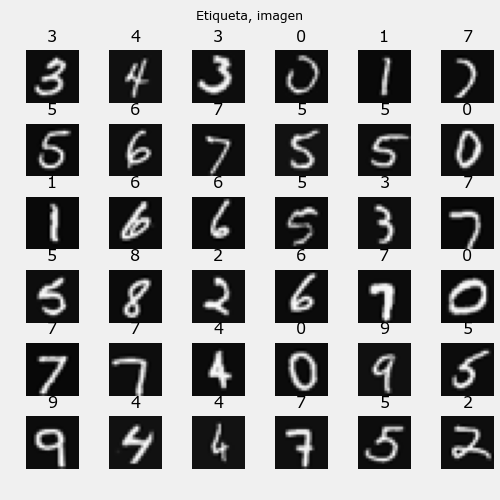

In [3]:
# Cargamos la base de datos
X, y = load_data()
#Grafiamos 36 imágemnes aleatorias
import warnings
m, n = X.shape
fig, axes = plt.subplots(6,6, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) 
widgvis(fig)
for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20,20)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Etiqueta, imagen", fontsize=9)


In [4]:
# Sequential model
tf.random.set_seed(1234)
model = Sequential(
    [               
        tf.keras.Input(shape=(400)),   
        Dense(units=25, activation='relu'),  
        Dense(units=15, activation='relu'),   
        Dense(units=10, activation='linear')
    ], name = "my_model"  
)


In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=100
)

plot_loss_tf(history)

Epoch 1/100
157/157 [==============================] - 2s 4ms/step - loss: 1.5563
Epoch 2/100
157/157 [==============================] - 0s 3ms/step - loss: 0.5745
Epoch 3/100
 87/157 [===============>..............] - ETA: 0s - loss: 0.4254

In [ ]:
image = X[1015]
display_digit(image)
prediction = model.predict(image.reshape(1,400))
print(f" Predición: \n{prediction}")
print(f" Resultado: {np.argmax(prediction)}")

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
m, n = X.shape
fig, axes = plt.subplots(6,6, figsize=(6,6))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
    # Seleccionar matriz de 6x6 imagenes
for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20,20)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    # Reconoce usando red neuronal
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    # Muestra la etiqueta y la predición
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Etiqueta, yhat", fontsize=14)
plt.show()

In [ ]:
print( f"{display_errors(model,X,y)} Errores encontrados en {len(X)} imágenes")